# Visualise the data

In this Notebook, we're going to visualise the data. We start with a histogram that shows the amount of articles of a certain subject over time. Then, we make column charts to see which keywords are present in a certain selection, and a wordcloud to display the 20 most common words for a given selection.

If you do not have a suitable dataset yet, you can use the [Preparing the data Notebook](https://github.com/KBNLresearch/delpher_demo/blob/main/Notebooks/Preparing%20the%20data.ipynb) to prepare your data. Alternatively, you can use the example datasets ['testset_bag_of_words.csv](https://github.com/KBNLresearch/delpher_demo/blob/main/Notebooks/Preparing%20the%20data.ipynb)  and ['testset_keywords.csv](https://github.com/KBNLresearch/delpher_demo/blob/main/data/testset_keywords.csv) that are located in the data folder of this Github page. The file ['stopwords.csv](https://github.com/KBNLresearch/delpher_demo/blob/main/data/stopwords.csv) is also needed.

If you have not yet installed the following packages, please install them on your command line with the following code: 
```
pip install pandas
pip install matplotlib
pip install wordcloud
```

In [37]:
## Import the necessary packages
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [85]:
## Load the datasets
file_articles = ## Set the folder and name of the file (including .csv) in quotes
articles = pd.read_csv(file_articles)
file_keywords = ## Set the folder and name of the file (including .csv) in quotes
keywords = pd.read_csv(file_keywords)
## The stopwords dataset will be loaded later on

In [61]:
## Check if everything is loaded correctly
articles.head(2)

,identifier,type,title,papertitle,date,text,category,bag_of_words,year
0,http://resolver.kb.nl/resolve?urn=ddd:01028724...,artikel,Levensgevaar en levensbehoud.,"De Groot, Kolff & Co",1867-12-23,Over havenwerken geen uitweiding thans. Wannee...,pandemie,100 150 1844 20 40 50 500 60 80 a a aan aan aa...,1867
1,http://resolver.kb.nl/resolve?urn=ddd:01028720...,artikel,De Hygiène en de Cholera. Een woord naar aanle...,"De Groot, Kolff & Co",1867-09-13,Onze goede veste wordt wederom bezocht door ee...,pandemie,1 1 aan aanoch af afgevoerd al als als als als...,1867


In [62]:
keywords.head(2)

,identifier,keyword
0,http://resolver.kb.nl/resolve?urn=ddd:01028724...,ziekte
1,http://resolver.kb.nl/resolve?urn=ddd:01028681...,ziekte


## Choose a category

As first step, we are going to explore which categories are present in the data. Then we choose a category that will be used for the upcoming charts. If you want to change the category, all the following code will need to be run again to get the adapted output.

In [63]:
print(articles['category'].unique())

['pandemie' 'immuniteit' 'uitbraak']


Choose one category and store it in a variable:

In [64]:
## Set the variable for category, this will be used in the subsequent steps.
## If you change it, rerun all the cells beneath this cell in order to get the adapted output.
category = "immuniteit"

## Histogram

We plot a histogram which visualises the amount of articels per year for a given category.

In [65]:
## We now create a subframe which only contains the articles of the choosen category
category_frame = articles[articles['category'] == category]

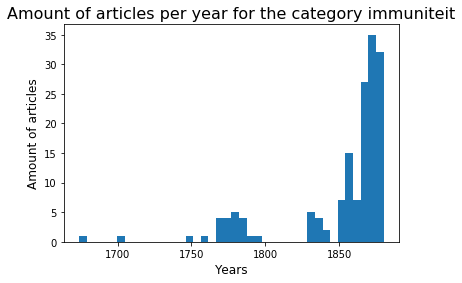

In [103]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = category_frame['year']
plt.hist(x,  bins=40) 
plt.title("Amount of articles per year for the category "+category, fontsize=16)
plt.ylabel('Amount of articles', fontsize=12)
plt.xlabel('Years', fontsize=12);

## Column chart for keyword frequencies

This chart shows the amount of articles that contain a certain keyword for a given year. 

In [67]:
## As the first step, we add the category and year information to the keywords frame
cat_and_year = articles[['identifier', 'year', 'category']]
keyword_ext = keywords.merge(cat_and_year, on = 'identifier', how = 'left')

In [108]:
## Check if everything went correctly
keyword_ext.head(2)

,identifier,keyword,year,category
0,http://resolver.kb.nl/resolve?urn=ddd:01028724...,ziekte,1867,pandemie
1,http://resolver.kb.nl/resolve?urn=ddd:01028681...,ziekte,1865,pandemie


In [69]:
## Now we can create a dataframe  with the selected category, and use that to display the column chart of keywords
keyword_ext_cat = keyword_ext[keyword_ext['category'] == category]

#### Column chart for the total category

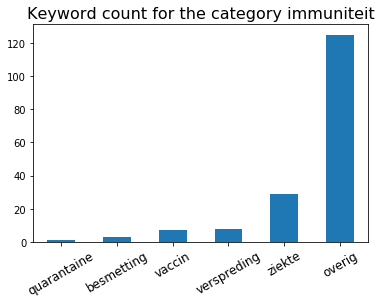

In [105]:
## Display the column chart
keyword_ext_cat.keyword.value_counts().sort_values().plot(kind = 'bar')
plt.xticks(rotation=30, fontsize=12)
plt.title("Keyword count for the category "+category, fontsize=16)
plt.show()

#### Column chart for a certain year from the selected category

In [71]:
## See which years are available for the current selection
keyword_ext_cat['year'].unique()

array([1862, 1869, 1880, 1874, 1878, 1873, 1865, 1875, 1871, 1857, 1870,
       1879, 1850, 1866, 1876, 1854, 1867, 1861, 1778, 1841, 1831, 1674,
       1863, 1775, 1761, 1772, 1872, 1749, 1838, 1783, 1781, 1786, 1834,
       1704, 1830, 1768, 1842, 1835, 1860, 1855, 1784, 1868, 1837, 1780,
       1779, 1832, 1877, 1794, 1788, 1785], dtype=int64)

In [72]:
## And set one of the years as variabele
year = 1867 

In [73]:
## We create a dataframe which only contains keywords of the chosen year
keyword_ext_cat_year = keyword_ext_cat[keyword_ext_cat['year'] == year]

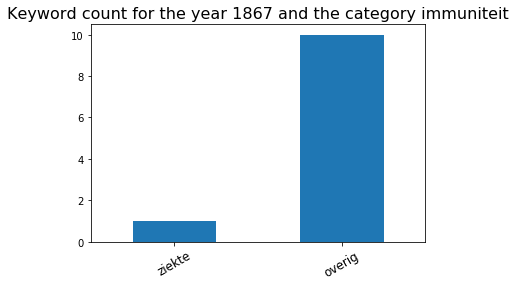

In [107]:
## And then display the column chart
keyword_ext_cat_year.keyword.value_counts().sort_values().plot(kind = 'bar')
plt.xticks(rotation=30, fontsize=12)
plt.title("Keyword count for the year "+str(year)+" and the category "+category, fontsize=16)
plt.show()


## Wordcloud

In [89]:
## We now create a subframe which only contains the articles of the chosen category
category_frame = articles[articles['category'] == category]

In [76]:
## Read the file with the stopwords
path_stop = ## Set the folder and name of the file (including .csv) in quotes
stop = pd.read_csv(path_stop, header=None, names = ['words'])

In [77]:
## Transform the frame with the stopwords to a list
stop = stop['words'].tolist()

In [90]:
## Transform the 'bag of words' column into a list
category_frame.loc[:,'bag_of_words'] = category_frame.loc[:,'bag_of_words'].apply(lambda x: list(x.split(" ")))
## And then make a list of this column
word_list = category_frame['bag_of_words'].tolist()

In [91]:
## We now have a list of lists, which we will transform into a single list with each word as a seperate element
bow = []
for i in word_list:
    bow = bow + i
 

In [92]:
## Then we use that list to create a dictionary of word frequencies
words = {}

for i in bow:
    if i not in stop:
        if i in words:
            words[i] += 1
        else:
            words[i] = 1

In [93]:
## Then we use the counter to count the 20 most common words
top_words = dict(Counter(words).most_common(15))

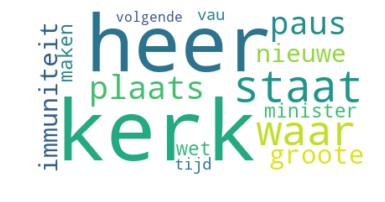

In [94]:
## We set the parameters for the wordcloud
wc = WordCloud(background_color="white", max_words=20)
    
wc.generate_from_frequencies(top_words)

plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()